## RNN

![WhatsApp Image 2025-06-19 at 20.33.48_de980c5e.jpg](<attachment:WhatsApp Image 2025-06-19 at 20.33.48_de980c5e.jpg>)

![WhatsApp Image 2025-06-19 at 20.36.01_e61eda47.jpg](<attachment:WhatsApp Image 2025-06-19 at 20.36.01_e61eda47.jpg>)
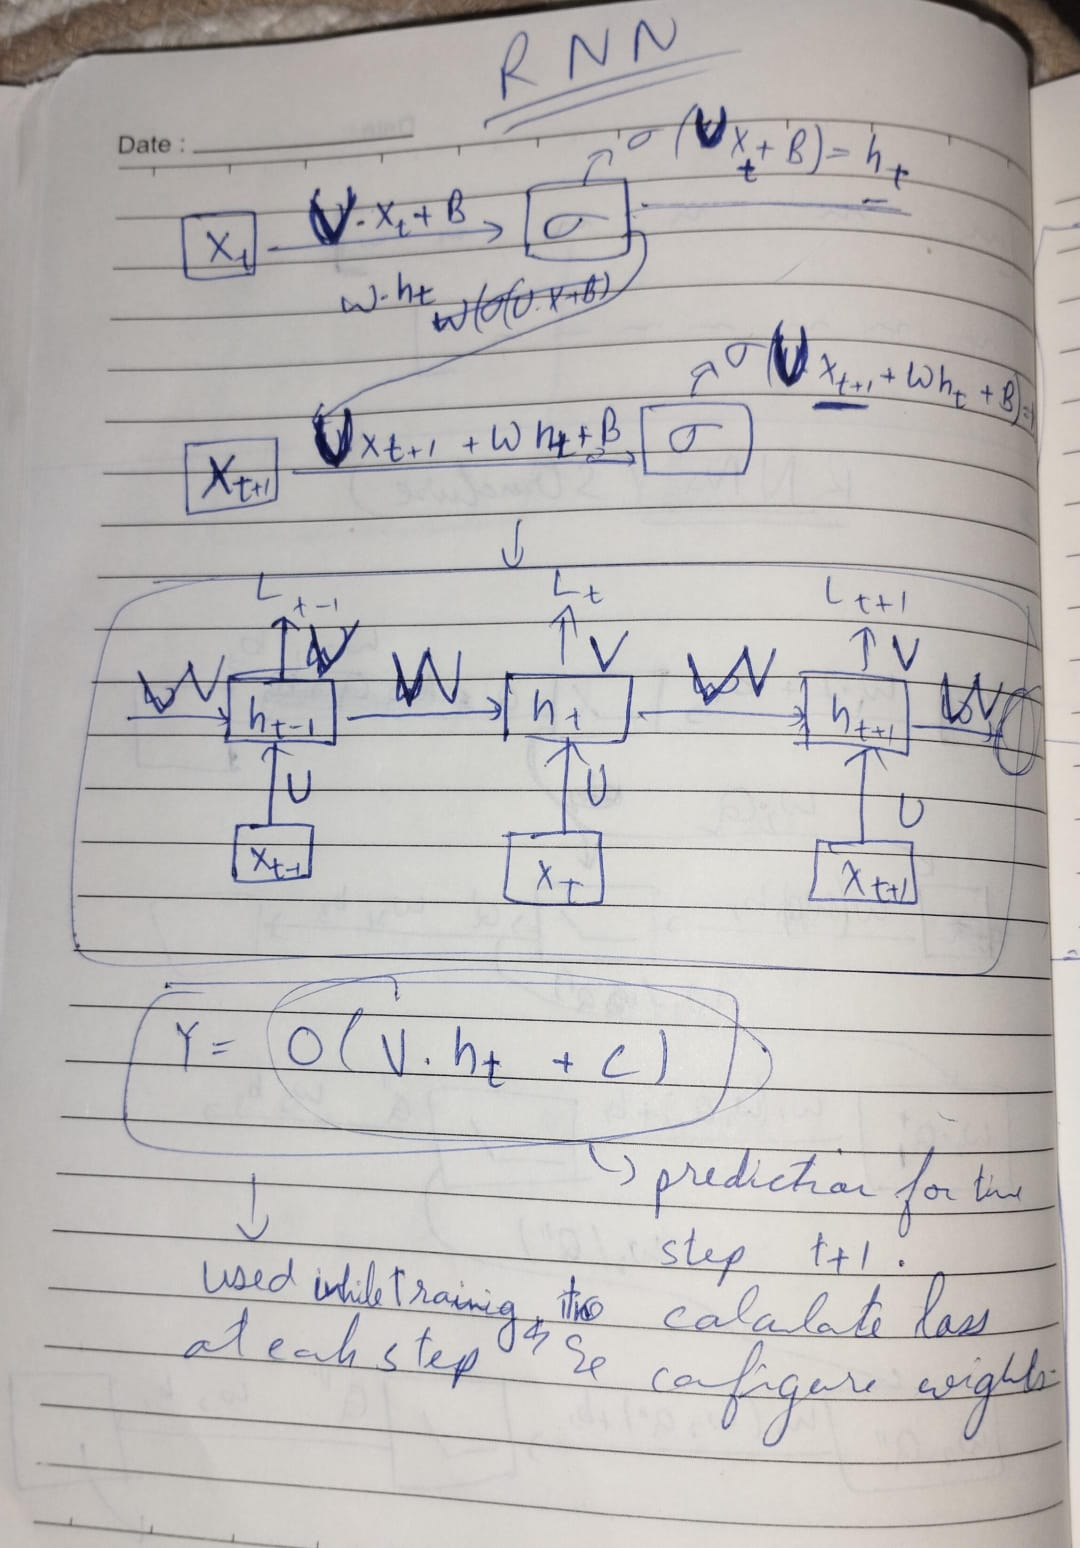
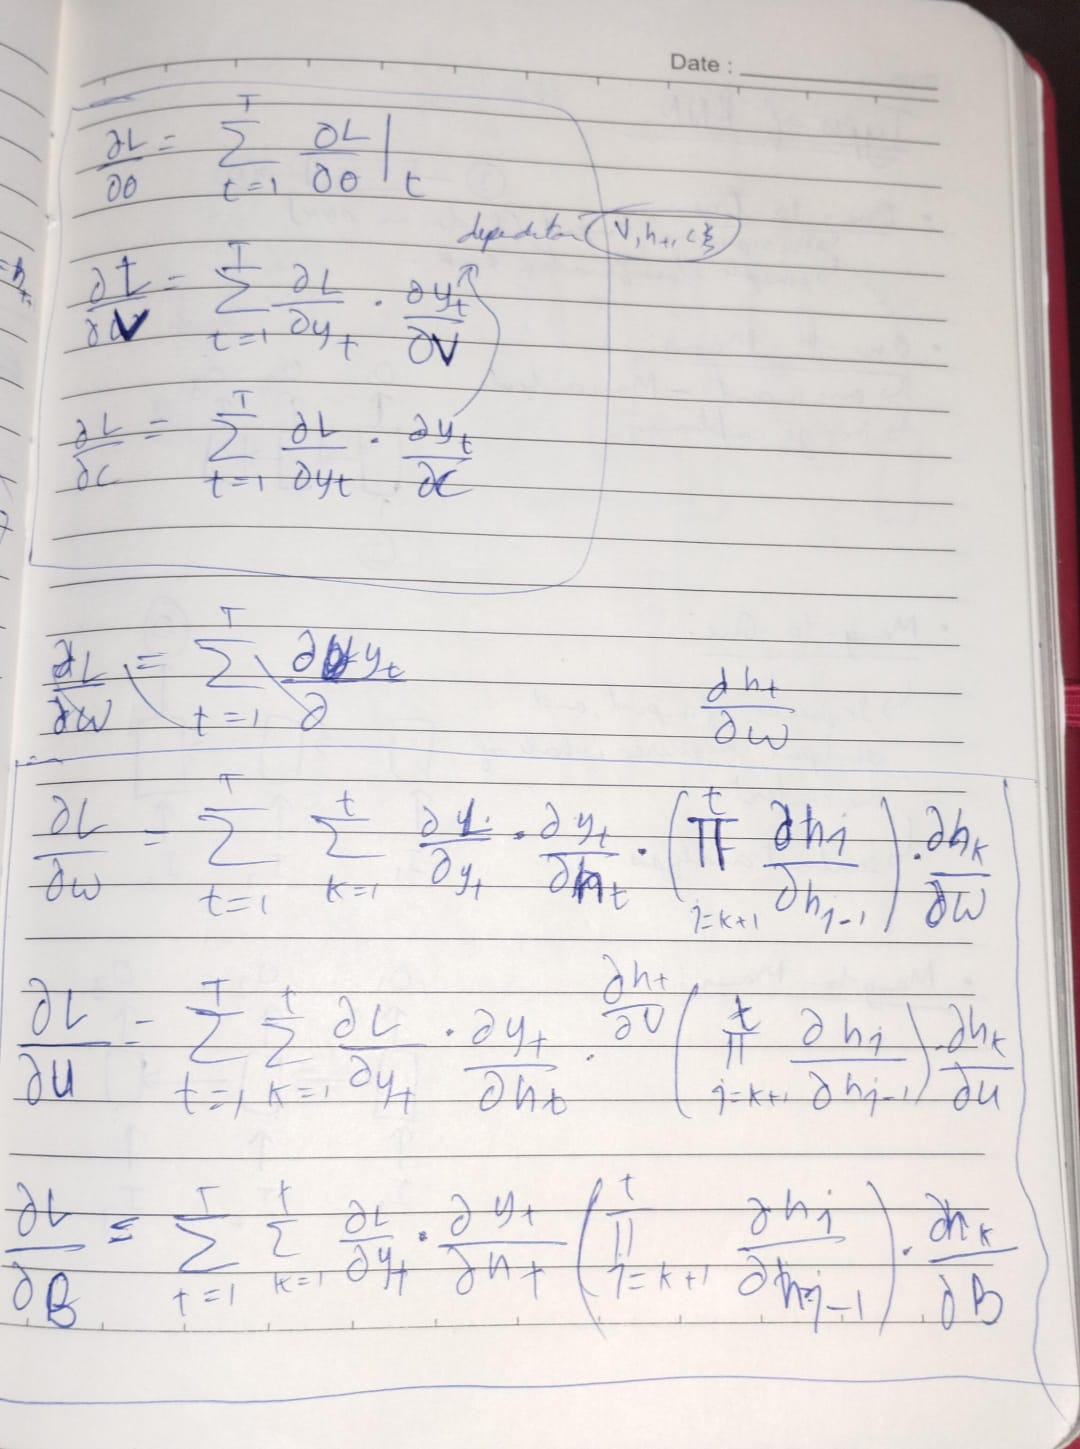

**Types of RNNs**

1. One to one: No sequential input, used in simple classification tasks. (Same as Classical ANNs)

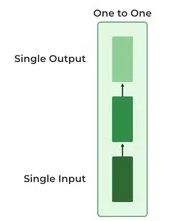

2. One to Many: No sequential input instead one input is used to produce mmultiple outputs. Used in tasks like Image captioning.

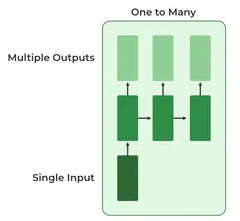

3. Many to One: Sequential input is used to produce simgle output, such tasks involve making used of the whole context of the inputs. Usded in tasks such as Sentiment analysis.

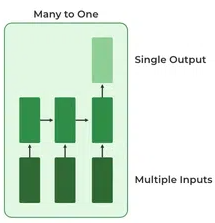

4. Many to Many: Sequence of inputs is used to produce output at each step and successive steps require input from previous inputs. Used in tasks such as Name Entity Recognition.

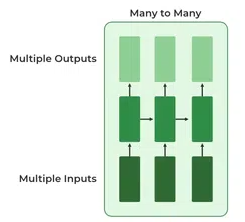

## Bi RNN

![WhatsApp Image 2025-06-19 at 20.37.40_96aee427.jpg](<attachment:WhatsApp Image 2025-06-19 at 20.37.40_96aee427.jpg>)

![WhatsApp Image 2025-06-19 at 20.37.54_7d13d155.jpg](<attachment:WhatsApp Image 2025-06-19 at 20.37.54_7d13d155.jpg>)
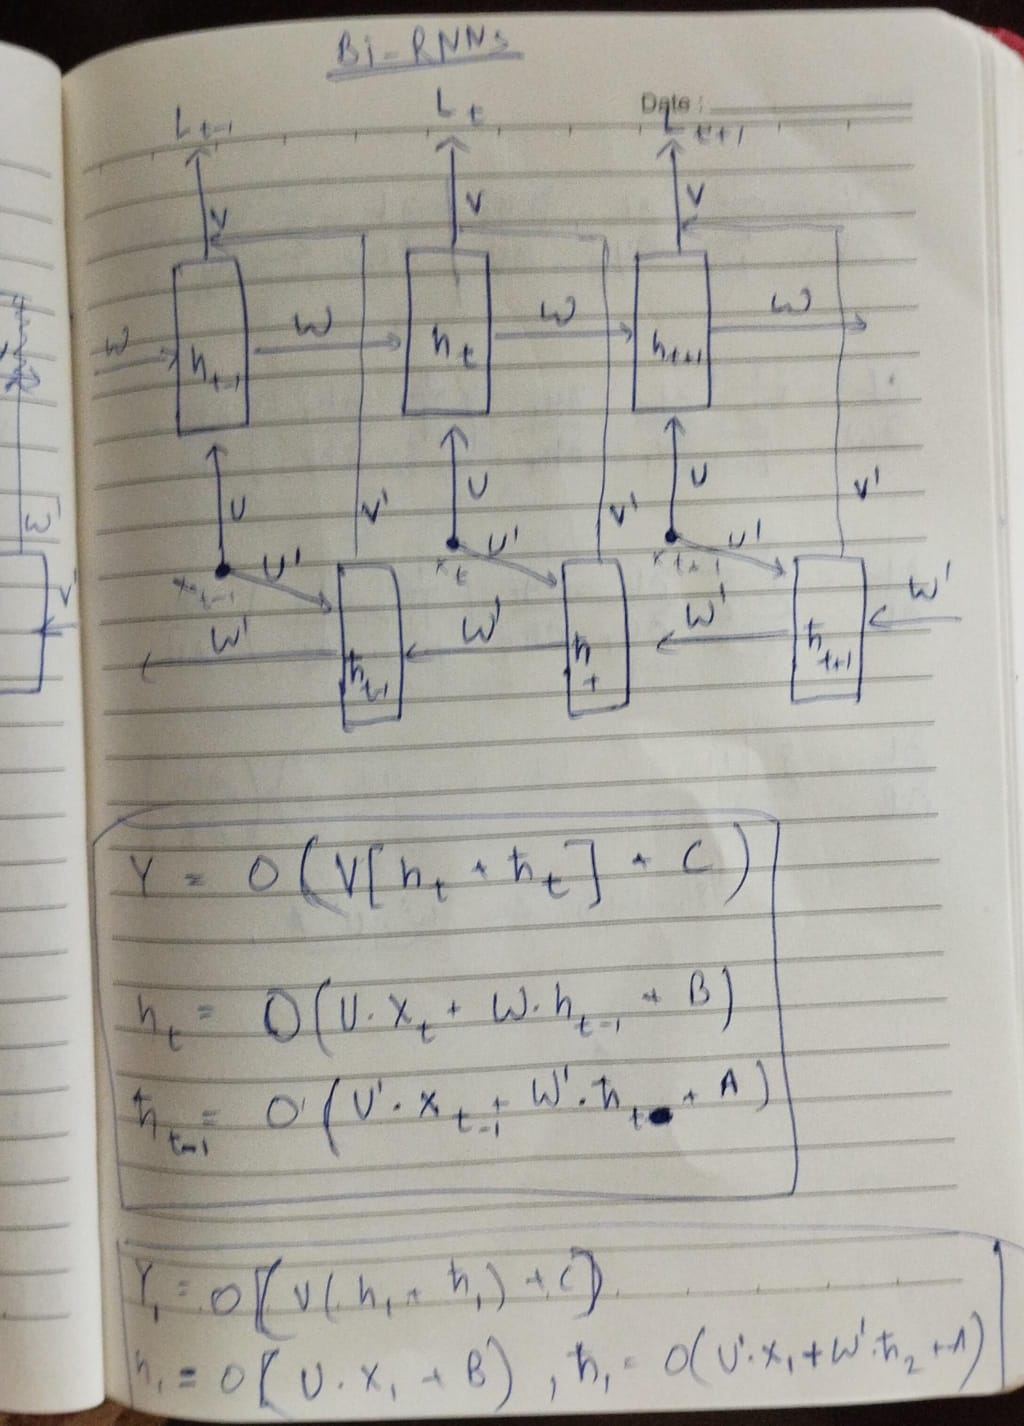
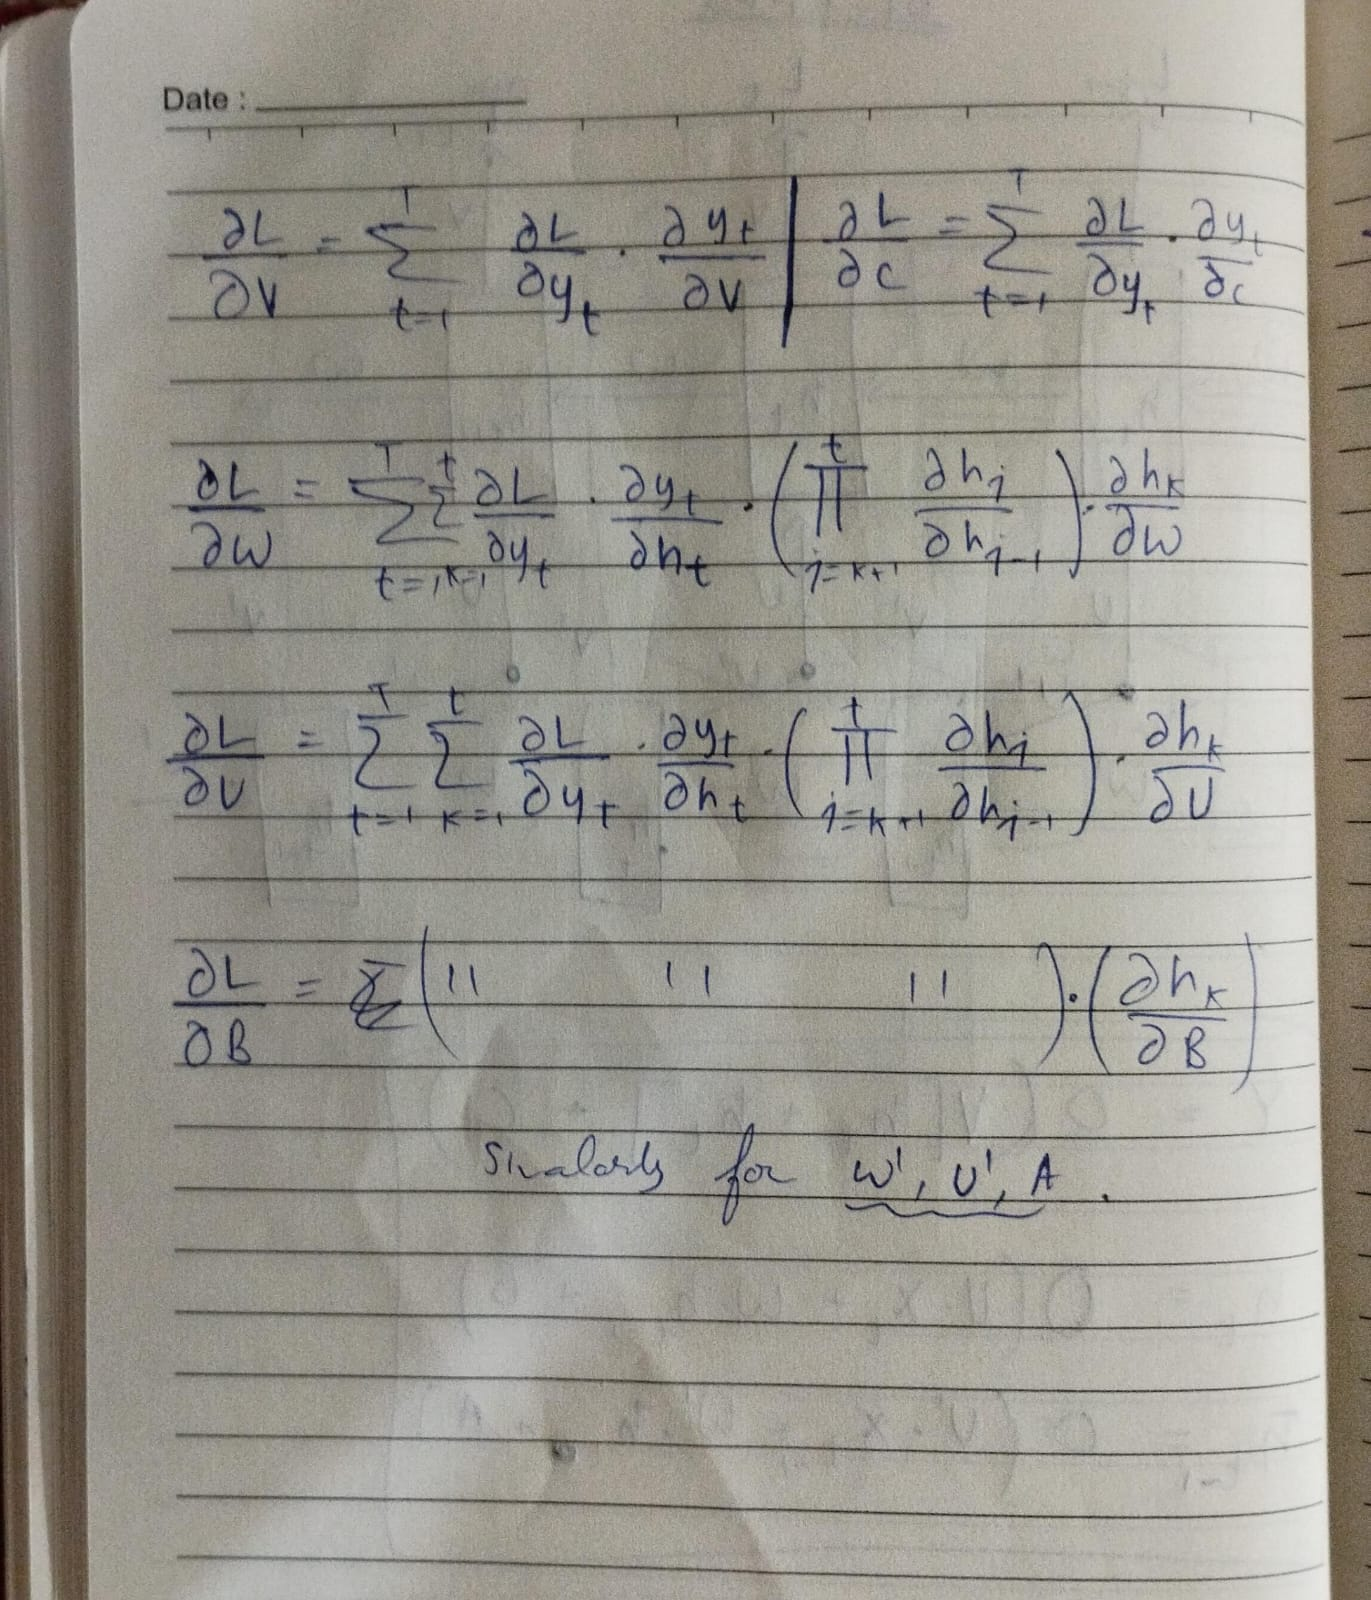

## LSTM

![WhatsApp Image 2025-06-19 at 20.38.11_46d371df.jpg](<attachment:WhatsApp Image 2025-06-19 at 20.38.11_46d371df.jpg>)

![WhatsApp Image 2025-06-19 at 20.38.36_afbc15f4.jpg](<attachment:WhatsApp Image 2025-06-19 at 20.38.36_afbc15f4.jpg>)
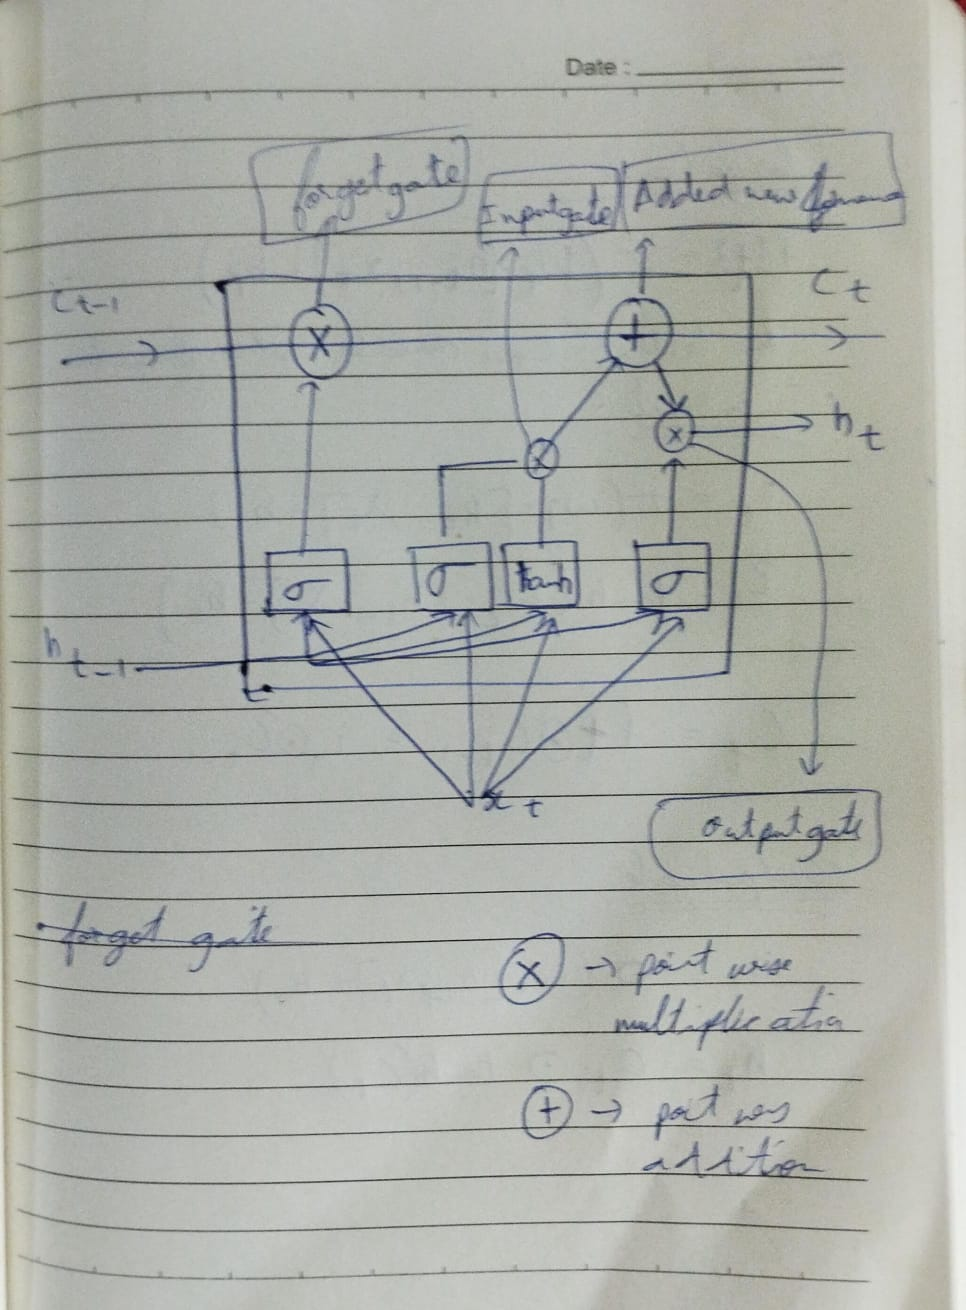
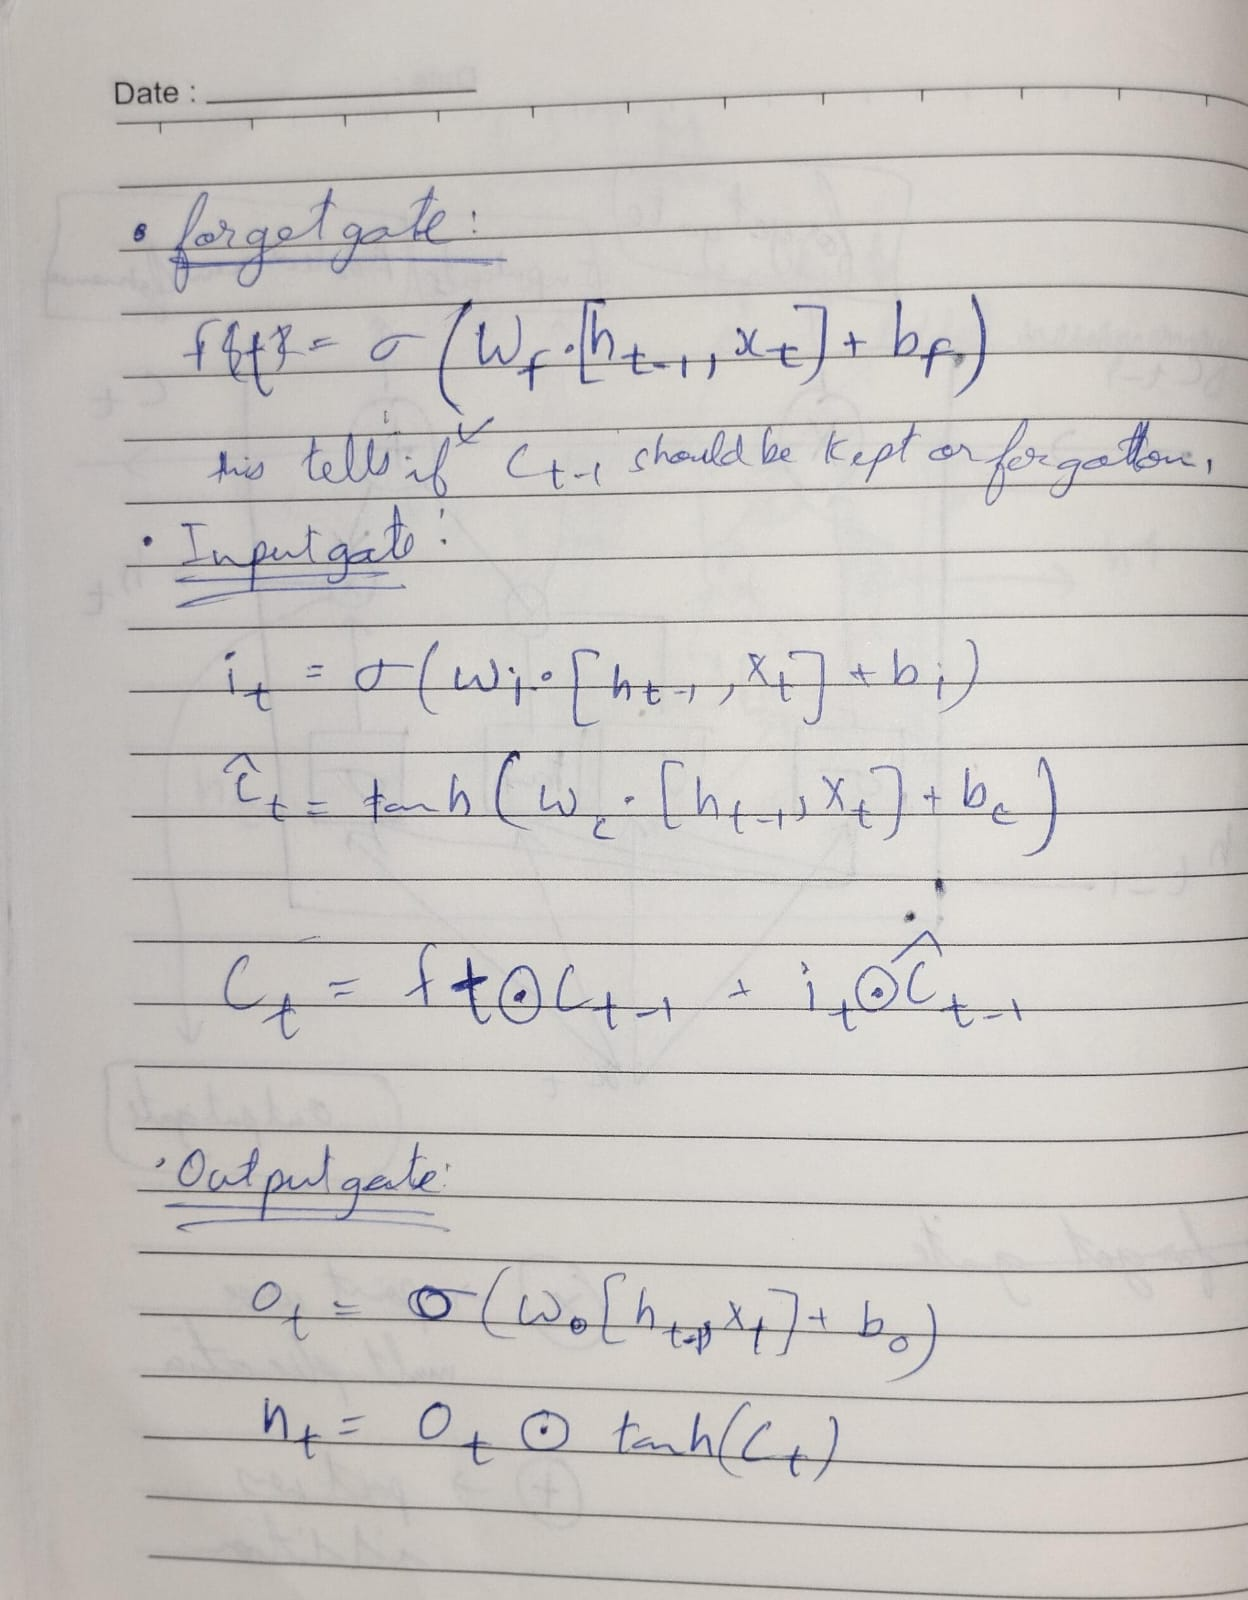

**An Implementation of Sarcasm detection using LSTM**

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json
/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset.json


In [4]:
import json

f= open("/kaggle/input/news-headlines-dataset-for-sarcasm-detection/Sarcasm_Headlines_Dataset_v2.json", 'r')

sentences= []
labels= []

for line in f:
    item= json.loads(line)
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

print(len(sentences))
print(sentences[0])
print(labels[0])

28619
thirtysomething scientists unveil doomsday clock of hair loss
1


In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer= Tokenizer(num_words=10000, oov_token="<oov>")
tokenizer.fit_on_texts(sentences)

words_dict= tokenizer.word_index
print(list(words_dict.values())[-1])

2025-06-19 18:14:59.332590: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750356899.610757      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750356899.713843      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


30885


In [58]:
max_size = max(len(sentence.split()) for sentence in sentences)
print("Maximum size:", max_size)  

min_size = min(len(sentence.split()) for sentence in sentences)
print("Minimum size:", min_size)  

Maximum size: 151
Minimum size: 2


In [59]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences= tokenizer.texts_to_sequences(sentences)
padded_sqn= pad_sequences(sequences, maxlen=75, padding="post", truncating="post")

In [60]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test= tts(padded_sqn, labels, test_size=0.3, random_state=42)

In [61]:
len(x_train)
print(x_train[0])

[ 111 4967    2 1582   84  584    3 8483    9 7262  537    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]


In [62]:
x_train= np.array(x_train)
x_test= np.array(x_test)
y_train= np.array(y_train)
y_test= np.array(y_test)

**The embedding layers expeccts inputs in this form: [ [1,2,3,4,5], [3,8,10,11] ] i.e all the sentences are stores as a list of labelings of numbers corresponding to distinct tokens and stored in a list**

In [97]:
from tensorflow.keras import layers, models

model=models.Sequential([
    layers.Input(shape=(75,)),
    layers.Embedding(input_dim= 10000, output_dim= 32),
    # layers.Dropout(0.25),
    layers.LSTM(units=64),
    # layers.Dropout(0.25),
    # layers.Dense(128, activation='relu'),
    # layers.Dense(64, activation='relu'),
    # layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation="sigmoid"),
])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)             │ (None, 75, 32)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 349,313 (1.33 MB)

 Trainable params: 349,185 (1.33 MB)

 Non-trainable params: 128 (512.00 B)

In [93]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=4,            
    restore_best_weights=True  
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   
    factor=0.5,            
    patience=2,            
    min_lr=1e-6,           
    verbose=1
)

In [ ]:
model.compile(
    loss="categorical_crossentropy", 
    optimizer="adam", 
    metrics=['accuracy'])

In [99]:
history= model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stop, reduce_lr])

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - accuracy: 0.6327 - loss: 0.5932 - val_accuracy: 0.5326 - val_loss: 0.6643 - learning_rate: 0.0010
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - accuracy: 0.9015 - loss: 0.2432 - val_accuracy: 0.6242 - val_loss: 1.2106 - learning_rate: 0.0010
Epoch 3/10
125/126 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9373 - loss: 0.1590
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.9372 - loss: 0.1592 - val_accuracy: 0.5785 - val_loss: 1.3790 - learning_rate: 0.0010
Epoch 4/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.9629 - loss: 0.1072 - val_accuracy: 0.8183 - val_loss: 0.5673 - learning_rate: 5.0000e-04
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9763 - loss: 0.0676 - val_accuracy: 0.7619 - val_loss: 0.8079 - learning_rate: 5.0000e-04
Epoch 6/10
125/126 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.979

In [101]:
model.save("LSTM_1.keras")

**Other test**

In [142]:
# Predict probabilities (for binary classification, output is between 0 and 1)
def predict(x_test, y_test, model):
    model= model
    y_pred_prob = model.predict(x_test)
    y_pred = (y_pred_prob > 0.5).astype(int)
    loss, accuracy = model.evaluate(x_test, y_test)
    print("Test accuracy:", accuracy)


In [13]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,            
    restore_best_weights=True  
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   
    factor=0.25,            
    patience=2,            
    min_lr=1e-6,           
    verbose=1
)

In [141]:
from tensorflow.keras import layers, models

model=models.Sequential([
    layers.Input(shape=(75,)),
    layers.Embedding(input_dim= 10000, output_dim= 32),
    # layers.Dropout(0.25),
    layers.LSTM(units=64),
    # layers.Dropout(0.25),
    # layers.Dense(128, activation='relu'),
    # layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(
    loss="binary_crossentropy", 
    optimizer="adam", 
    metrics=['accuracy'])

model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)             │ (None, 75, 32)              │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_23 (LSTM)                       │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 349,185 (1.33 MB)

 Trainable params: 349,121 (1.33 MB)

 Non-trainable params: 64 (256.00 B)

In [137]:
history= model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2, callbacks=[early_stop, reduce_lr])

Epoch 1/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - accuracy: 0.8461 - loss: 0.3460 - val_accuracy: 0.7043 - val_loss: 0.5168 - learning_rate: 0.0010
Epoch 2/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9214 - loss: 0.2028 - val_accuracy: 0.8226 - val_loss: 0.4077 - learning_rate: 0.0010
Epoch 3/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.9485 - loss: 0.1391 - val_accuracy: 0.8298 - val_loss: 0.4438 - learning_rate: 0.0010
Epoch 4/10
125/126 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.9571 - loss: 0.1119
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9570 - loss: 0.1121 - val_accuracy: 0.4764 - val_loss: 1.9264 - learning_rate: 0.0010
Epoch 5/10
126/126 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9775 - loss: 0.0681 - val_accuracy: 0.8248 - val_loss: 0.5690 - learning_rate: 2.5000e-04


In [138]:
model.save("LSTM_2.keras")

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=3,            
    restore_best_weights=True  
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   
    factor=0.4,            
    patience=2,            
    min_lr=1e-6,           
    verbose=1
)

In [140]:
predict(x_test, y_test, model=keras.models.load_model("LSTM_1.keras"))
predict(x_test, y_test, model=keras.models.load_model("LSTM_2.keras"))

269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
269/269 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8268 - loss: 0.5527
Test accuracy: 0.8204053044319153
269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
269/269 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.8334 - loss: 0.3953
Test accuracy: 0.825529932975769


**More test**

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer= Tokenizer(num_words=15000, oov_token="<oov>")
tokenizer.fit_on_texts(sentences)

words_dict= tokenizer.word_index
print(list(words_dict.values())[-1])

2025-06-19 18:26:38.255281: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750357598.516421      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750357598.589877      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


30885


In [5]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

sequences= tokenizer.texts_to_sequences(sentences)
padded_sqn= pad_sequences(sequences, maxlen=151, padding="post", truncating="post")

In [6]:
from sklearn.model_selection import train_test_split as tts

x_train, x_test, y_train, y_test= tts(padded_sqn, labels, test_size=0.3, random_state=42)

In [8]:
x_train= np.array(x_train)
x_test= np.array(x_test)
y_train= np.array(y_train)
y_test= np.array(y_test)

In [22]:
from tensorflow.keras import layers, models

model=models.Sequential([
    layers.Input(shape=(151,)),
    layers.Embedding(input_dim= 15000, output_dim= 32),
    # layers.Dropout(0.25),
    layers.LSTM(units=64, return_sequences=True),
    layers.LSTM(units=64),
    # layers.Dropout(0.25),
    # layers.Dense(128, activation='relu'),
    # layers.Dense(32, activation='relu'),
    # layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation="sigmoid"),
])

model.compile(
    loss="binary_crossentropy", 
    optimizer="adam", 
    metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ (None, 151, 32)             │         480,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 151, 64)             │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 542,337 (2.07 MB)

 Trainable params: 542,209 (2.07 MB)

 Non-trainable params: 128 (512.00 B)

In [24]:
history= model.fit(x_train, y_train, epochs=15, batch_size=64, validation_split=0.2, callbacks=[early_stop, reduce_lr])

Epoch 1/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.5311 - loss: 0.6917 - val_accuracy: 0.5238 - val_loss: 0.6920 - learning_rate: 0.0010
Epoch 2/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5284 - loss: 0.6917 - val_accuracy: 0.5238 - val_loss: 0.6921 - learning_rate: 0.0010
Epoch 3/15
250/251 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5242 - loss: 0.6921
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5242 - loss: 0.6921 - val_accuracy: 0.4762 - val_loss: 0.6955 - learning_rate: 0.0010
Epoch 4/15
251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.5260 - loss: 0.6919 - val_accuracy: 0.5238 - val_loss: 0.6920 - learning_rate: 2.5000e-04
